In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import json
import functools 
from datetime import datetime
from time import time
import pendulum
import mysql.connector
import alc_connect as alc
import config
import numpy as np
%matplotlib inline

### Reading in yellow taxi CSV files  

# 2019

In [2]:
jan19 = pd.read_csv('yellowtaxi-trip-data/2019/yellow_tripdata_2019-01.csv')

In [3]:
jan19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [4]:
feb19 = pd.read_csv('yellowtaxi-trip-data/2019/yellow_tripdata_2019-02.csv')

In [5]:
feb19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7019375 entries, 0 to 7019374
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 964.0+ MB


In [6]:
mar19 = pd.read_csv('yellowtaxi-trip-data/2019/yellow_tripdata_2019-03.csv')

In [7]:
mar19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7832545 entries, 0 to 7832544
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.1+ GB


In [8]:
apr19 = pd.read_csv('yellowtaxi-trip-data/2019/yellow_tripdata_2019-04.csv')

In [9]:
apr19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433139 entries, 0 to 7433138
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1020.8+ MB


In [10]:
may19 = pd.read_csv('yellowtaxi-trip-data/2019/yellow_tripdata_2019-05.csv')

In [11]:
may19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565261 entries, 0 to 7565260
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [12]:
jun19 = pd.read_csv('yellowtaxi-trip-data/2019/yellow_tripdata_2019-06.csv')

In [13]:
jun19.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0.0,1,N,262,263,2,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1,4.4,1,N,74,7,2,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.8,1,N,145,145,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1,1.7,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5


### Concat 2019 Files

In [14]:
taxi19_data = [jan19, feb19, mar19, apr19, may19, jun19]

In [15]:
Ytaxi19 = pd.concat(taxi19_data, axis=0, sort=False, ignore_index = True)

In [16]:
Ytaxi19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44459136 entries, 0 to 44459135
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 6.0+ GB


In [ ]:
# Ytaxi19.drop(['VendorID','passenger_count','RatecodeID','store_and_fwd_flag','extra','mta_tax','improvement_surcharge','fare_amount','tip_amount','tolls_amount','congestion_surcharge'], axis = 1, inplace = True)

In [18]:
# Ytaxi19.to_csv('Ytaxi19.csv',index=False)

# Bring in Zone IDs

In [6]:
zone = pd.read_csv('zone.csv')

In [7]:
zone.head()

,LocationID,Address,latitude,longitude
0,1,"Newark Airport,",40.689064,-74.177255
1,2,"Jamaica Bay, Queens",40.603994,-73.835412
2,3,"Allerton, Bronx",40.865430,-73.867365
3,4,"Alphabet City, Manhattan",40.725102,-73.979583
4,5,"Arden Heights, Staten Island",40.557629,-74.188609


In [8]:
zone.rename(columns={"LocationID": "PULocationID"}, inplace = True)

# Read in 2019 csv

In [9]:
Ytaxi19 = pd.read_csv('Ytaxi19.csv')

In [13]:
Ytaxi19.describe()

,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
count,4.445914e+07,4.445914e+07,4.445914e+07,4.445914e+07,4.445914e+07
mean,2.963479e+00,1.633542e+02,1.616744e+02,1.284856e+00,1.863620e+01
std,7.909912e+00,6.616360e+01,7.030454e+01,4.743740e-01,2.371228e+02
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.508800e+02
25%,9.700000e-01,1.140000e+02,1.120000e+02,1.000000e+00,1.080000e+01
50%,1.600000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.416000e+01
75%,3.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,2.015000e+01
max,4.597722e+04,2.650000e+02,2.650000e+02,5.000000e+00,1.084772e+06


In [14]:
Ytaxi19.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [21]:
Ytaxi19.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,0.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,0.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,0.0,193,193,2,55.55


# Features 2019

In [22]:
Ytaxi19['tpep_pickup_datetime'] = pd.to_datetime(Ytaxi19['tpep_pickup_datetime'])

In [23]:
Ytaxi19['tpep_dropoff_datetime'] = pd.to_datetime(Ytaxi19['tpep_dropoff_datetime'])

In [24]:
#weekday
Ytaxi19['weekday'] = [datetime.weekday(d) for d in Ytaxi19['tpep_pickup_datetime']]

In [25]:
#month
Ytaxi19['month'] = pd.DatetimeIndex(Ytaxi19['tpep_pickup_datetime']).month

In [26]:
#month
Ytaxi19['hour'] = pd.DatetimeIndex(Ytaxi19['tpep_pickup_datetime']).hour

In [27]:
#year
Ytaxi19['year'] = pd.DatetimeIndex(Ytaxi19['tpep_pickup_datetime']).year

### merge

In [71]:
taxi19 = Ytaxi19.merge(zone, on='PULocationID')

In [72]:
taxi19.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,weekday,month,hour,year,Address,latitude,longitude
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.50,151,239,1,9.95,1,1,0,2019,"Manhattan Valley, Manhattan",40.799776,-73.967772
1,2019-01-01 00:52:37,2019-01-01 01:03:42,2.10,151,142,2,10.80,1,1,0,2019,"Manhattan Valley, Manhattan",40.799776,-73.967772
2,2019-01-01 00:15:02,2019-01-01 00:22:33,1.50,151,142,2,9.30,1,1,0,2019,"Manhattan Valley, Manhattan",40.799776,-73.967772
3,2019-01-01 00:44:29,2019-01-01 00:51:23,0.83,151,238,1,8.58,1,1,0,2019,"Manhattan Valley, Manhattan",40.799776,-73.967772
4,2019-01-01 00:54:30,2019-01-01 01:09:16,4.73,151,243,2,17.30,1,1,0,2019,"Manhattan Valley, Manhattan",40.799776,-73.967772


In [73]:
taxi19.rename(columns={'tpep_pickup_datetime': 'pickup_date', 'tpep_dropoff_datetime' : 'dropoff_date','Address':'burough'}, inplace = True)

In [82]:
taxi19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43958025 entries, 0 to 43958024
Data columns (total 14 columns):
pickup_date      datetime64[ns]
dropoff_date     datetime64[ns]
trip_distance    float64
PULocationID     int64
DOLocationID     int64
payment_type     int64
total_amount     float64
weekday          int64
month            category
hour             int64
year             int64
burough          object
latitude         float64
longitude        float64
dtypes: category(1), datetime64[ns](2), float64(4), int64(6), object(1)
memory usage: 5.9+ GB


In [76]:
taxi19.month.values()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
sns.catplot(x= 'month', y = '', data=tips);

### save_csv

In [279]:
taxi19.to_csv('taxi19.csv',index=False)

KeyboardInterrupt: 

In [278]:
taxi19.gorupby

(43958025, 26)

In [69]:
taxi19.head()

,pickup_date,dropoff_date,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,weekday,month,hour,...,3,4,5,6,7,8,9,10,11,12
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.50,151,239,1,9.95,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 00:52:37,2019-01-01 01:03:42,2.10,151,142,2,10.80,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:15:02,2019-01-01 00:22:33,1.50,151,142,2,9.30,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:44:29,2019-01-01 00:51:23,0.83,151,238,1,8.58,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:54:30,2019-01-01 01:09:16,4.73,151,243,2,17.30,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
taxi19['month'] = taxi19['month'].astype('category')

In [83]:
taxi19['burough'] = taxi19['burough'].astype('category')

In [240]:
taxi19['weekday'] = taxi19['weekday'].astype('category')

In [241]:
taxi19['hour'] = taxi19['hour'].astype('category')

In [242]:
taxi19['payment_type'] = taxi19['payment_type'].astype('category')

In [61]:
# monthdums = pd.get_dummies(taxi19['month'], drop_first=True)

In [112]:
taxi19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43958025 entries, 0 to 43958024
Data columns (total 14 columns):
pickup_date      datetime64[ns]
dropoff_date     datetime64[ns]
trip_distance    float64
PULocationID     int64
DOLocationID     int64
payment_type     int64
total_amount     float64
weekday          int64
month            category
hour             int64
year             int64
burough          category
latitude         float64
longitude        float64
dtypes: category(2), datetime64[ns](2), float64(4), int64(6)
memory usage: 5.6 GB


In [62]:
# taxi19 = pd.concat([taxi19, monthdums], axis = 1)

In [92]:
df3 = taxi19.groupby('month').aggregate(['mean' , sum ])

In [93]:
df3.head()

trip_distance               PULocationID             DOLocationID  \
               mean           sum         mean         sum         mean   
month                                                                     
1          2.809084  2.107992e+07   163.352870  1225832446   161.873412   
2          2.889073  2.006421e+07   162.433338  1128077281   160.988436   
3          2.994597  2.328465e+07   161.246694  1253782054   159.723398   
4          3.000906  2.208526e+07   162.360501  1194897137   160.695139   
5          3.037487  2.276790e+07   162.459606  1217738398   161.045301   

                  payment_type          total_amount                 weekday  \
              sum         mean      sum         mean           sum      mean   
month                                                                          
1      1214730298     1.291306  9690219    15.601552  1.170772e+08  2.909103   
2      1118042633     1.269275  8814938    18.526333  1.286628e+08  3.005289   
3      1241937584     1.277937  9936664    19.155964  1.489482e+08  3.201844   
4      1182640858     1.288226  9480736    19.190412  1.412324e+08  2.811130   
5      1207137278     1.287918  9653770    19.490641  1.460948e+08  2.990684   

                      hour                    year                latitude  \
            sum       mean        sum         mean          sum       mean   
month                                                                        
1      21830488  13.784112  103438723  2018.999673  15150975324  40.751691   
2      20871322  13.897603   96516946  2019.000008  14021678455  40.750992   
3      24896104  13.890071  108002971  2019.000003  15698839510  40.750473   
4      20688601  14.002569  103052337  2019.000006  14858893131  40.750734   
5      22417085  13.965073  104677130  2019.000000  15133693122  40.751086   

                     longitude                
                sum       mean           sum  
month                                         
1      3.058088e+08 -73.964543 -5.550446e+08  
2      2.830101e+08 -73.963339 -5.136653e+08  
3      3.168574e+08 -73.964720 -5.751165e+08  
4      2.999063e+08 -73.965621 -5.443523e+08  
5      3.054554e+08 -73.965586 -5.544193e+08

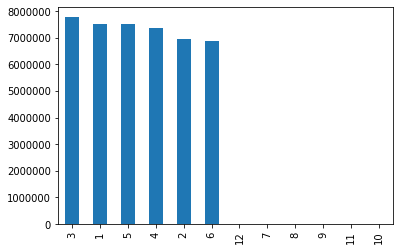

In [94]:
taxi19['month'].value_counts().plot(kind='bar')

In [101]:
order = ["1", "2", "3", "4", "4", "6",  "7", "8",
         "9", "10", "11", "12"]

Text(0, 0.5, 'Rides')

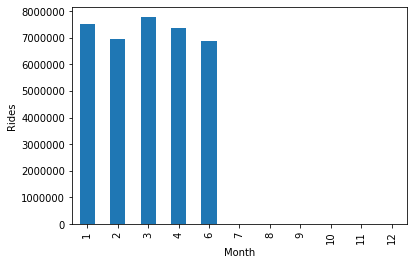

In [103]:
s = taxi19['month'].value_counts()
s.reindex(np.intersect1d(np.array(order).astype(float), s.index)).plot.bar()
plt.xlabel('Month')
plt.ylabel('Rides')

In [123]:
x = taxi19.groupby('burough').count()

In [130]:
q = x.sort_values(by=['trip_distance'])

In [231]:
p = q[231:251]

In [232]:
len(p)

20

In [233]:
new = pd.DataFrame(p['pickup_date'])

In [234]:
new

,pickup_date
burough,
"Garment District, Manhattan",900006
"Gramercy, Manhattan",1011930
"Midtown South, Manhattan",1024044
"Lenox Hill West, Manhattan",1040067
"East Chelsea, Manhattan",1065069
"East Village, Manhattan",1139959
"Upper West Side South, Manhattan",1156806
"LaGuardia Airport, Queens",1167513
"Midtown North, Manhattan",1179744


In [235]:
new.reset_index(inplace = True)

In [236]:
new.rename(columns={"pickup_date": "total_trips", 'burough' : 'borough'}, inplace = True)

In [237]:
new.head()


,borough,total_trips
0,"Garment District, Manhattan",900006
1,"Gramercy, Manhattan",1011930
2,"Midtown South, Manhattan",1024044
3,"Lenox Hill West, Manhattan",1040067
4,"East Chelsea, Manhattan",1065069


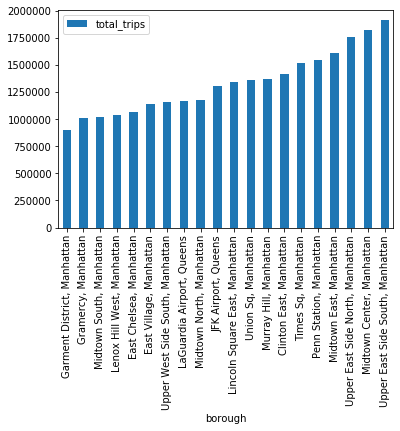

In [238]:
new.plot(kind='bar', x = 'borough')

In [244]:
taxi19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43958025 entries, 0 to 43958024
Data columns (total 14 columns):
pickup_date      datetime64[ns]
dropoff_date     datetime64[ns]
trip_distance    float64
PULocationID     int64
DOLocationID     int64
payment_type     category
total_amount     float64
weekday          category
month            category
hour             category
year             int64
burough          category
latitude         float64
longitude        float64
dtypes: category(5), datetime64[ns](2), float64(4), int64(3)
memory usage: 4.8 GB


In [265]:
taxi19 = pd.read_csv('taxi19.csv')

In [266]:
monthdums = pd.get_dummies(taxi19['month'], drop_first=False)

In [267]:
taxi19 = pd.concat([taxi19, monthdums], axis = 1)

In [268]:
taxi19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43958025 entries, 0 to 43958024
Data columns (total 26 columns):
pickup_date      object
dropoff_date     object
trip_distance    float64
PULocationID     int64
DOLocationID     int64
payment_type     int64
total_amount     float64
weekday          int64
month            int64
hour             int64
year             int64
burough          object
latitude         float64
longitude        float64
1                uint8
2                uint8
3                uint8
4                uint8
5                uint8
6                uint8
7                uint8
8                uint8
9                uint8
10               uint8
11               uint8
12               uint8
dtypes: float64(4), int64(7), object(3), uint8(12)
memory usage: 5.1+ GB


In [269]:
y = taxi19.groupby('burough').sum().reset_index()

In [270]:
y.columns

Index([      'burough', 'trip_distance',  'PULocationID',  'DOLocationID',
        'payment_type',  'total_amount',       'weekday',         'month',
                'hour',          'year',      'latitude',     'longitude',
                     1,               2,               3,               4,
                     5,               6,               7,               8,
                     9,              10,              11,              12],
      dtype='object')

In [271]:
y.drop(columns=['trip_distance',  'PULocationID',  'DOLocationID',
        'payment_type',  'total_amount',       'weekday',         'month',
                'hour',          'year',      'latitude',     'longitude'], inplace = True)

In [275]:
y.rename(columns={"burough": "borough"}, inplace = True)

In [276]:
y[0:50]

,borough,1,2,3,4,5,6,7,8,9,10,11,12
0,"Allerton, Bronx",175.0,177.0,222.0,125.0,158.0,174.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alphabet City, Manhattan",13954.0,13348.0,15459.0,12573.0,12718.0,11553.0,0.0,0.0,1.0,0.0,0.0,2.0
2,"Arden Heights, Staten Island",5.0,19.0,25.0,28.0,16.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Arrochar, Staten Island",33.0,28.0,30.0,48.0,16.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Astoria Park, Queens",66.0,89.0,79.0,97.0,104.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Astoria, Queens",11304.0,10265.0,11715.0,10522.0,10738.0,10579.0,0.0,0.0,0.0,0.0,0.0,6.0
6,"Auburndale, Queens",132.0,138.0,148.0,104.0,84.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"Baisley Park, Queens",2655.0,2490.0,2848.0,2332.0,2657.0,2645.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"Bath Beach, Brooklyn",141.0,140.0,174.0,88.0,117.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"Battery Park City, Manhattan",62168.0,56924.0,66445.0,66948.0,68341.0,66143.0,2.0,1.0,0.0,0.0,0.0,2.0


In [ ]:
 ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

In [184]:
sns.factorplot(x="burough", y="pickup_date", hue="class", kind="bar", data=new)

/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: Could not interpret input 'class'

In [173]:
new.plt.bar()

AttributeError: 'DataFrame' object has no attribute 'plt'

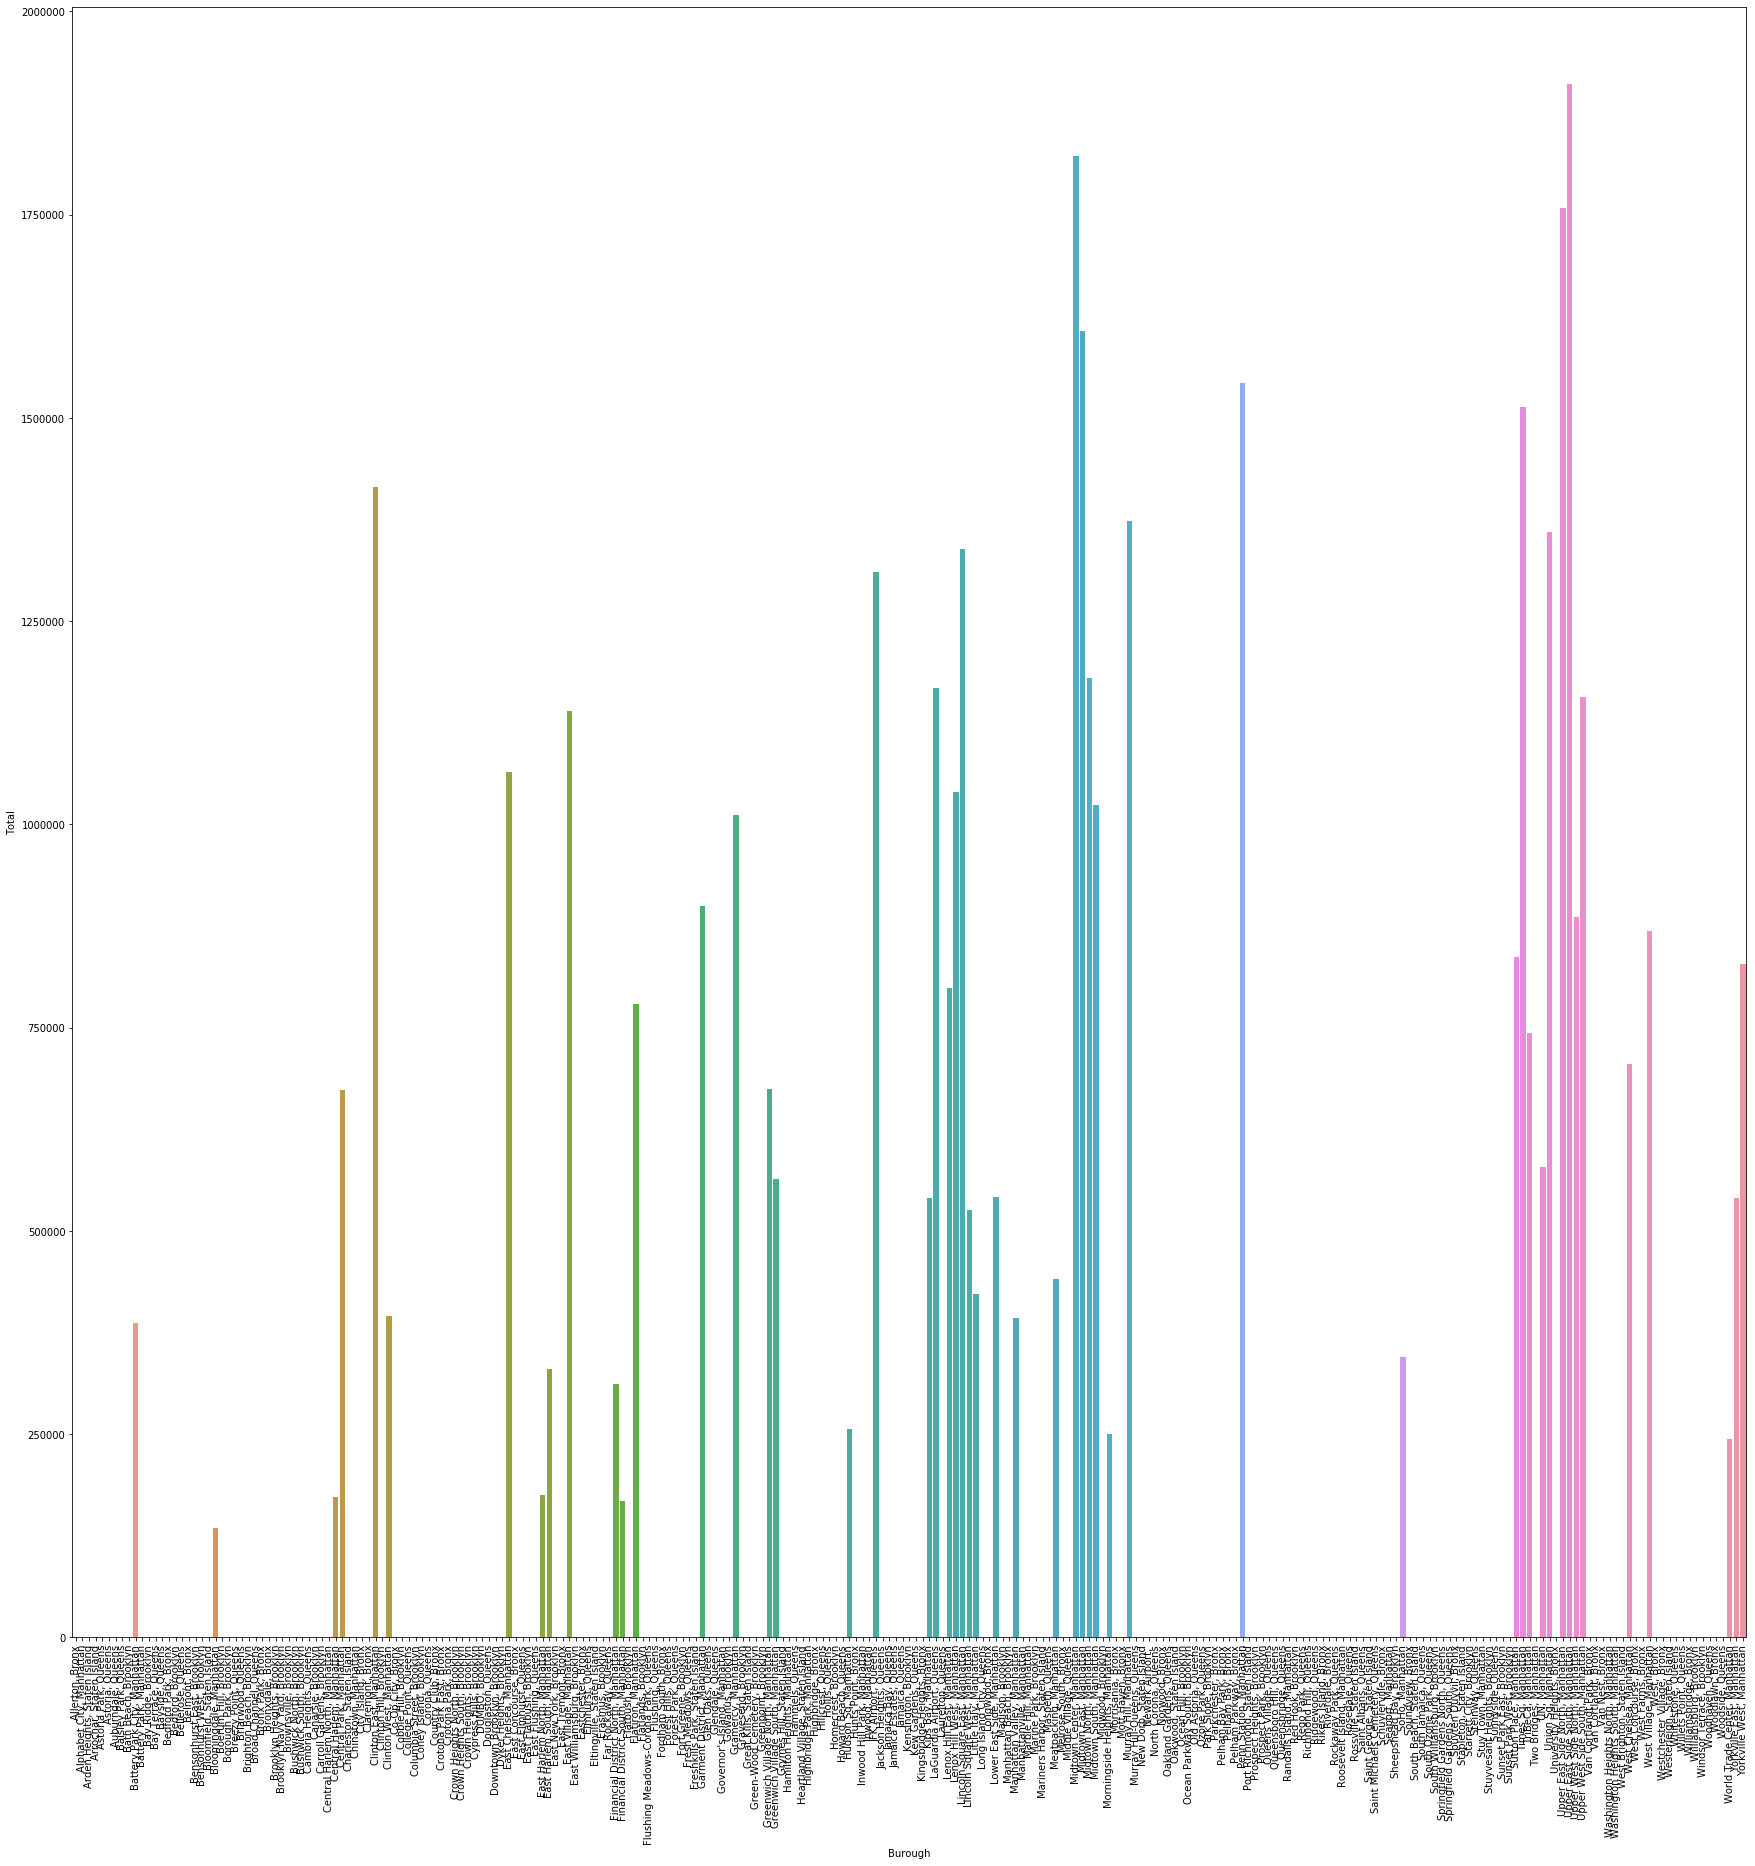

In [171]:
plt.figure(figsize = (30,30))
sns.barplot(x = new.burough, y = new.pickup_date)
plt.xlabel('Burough')
plt.ylabel('Total')
plt.xticks(rotation = '90')
plt.show()

In [158]:
sns.barplot(x= new.index, y="pickup_date", data=new);


ValueError: Could not interpret input 'pickup_date'

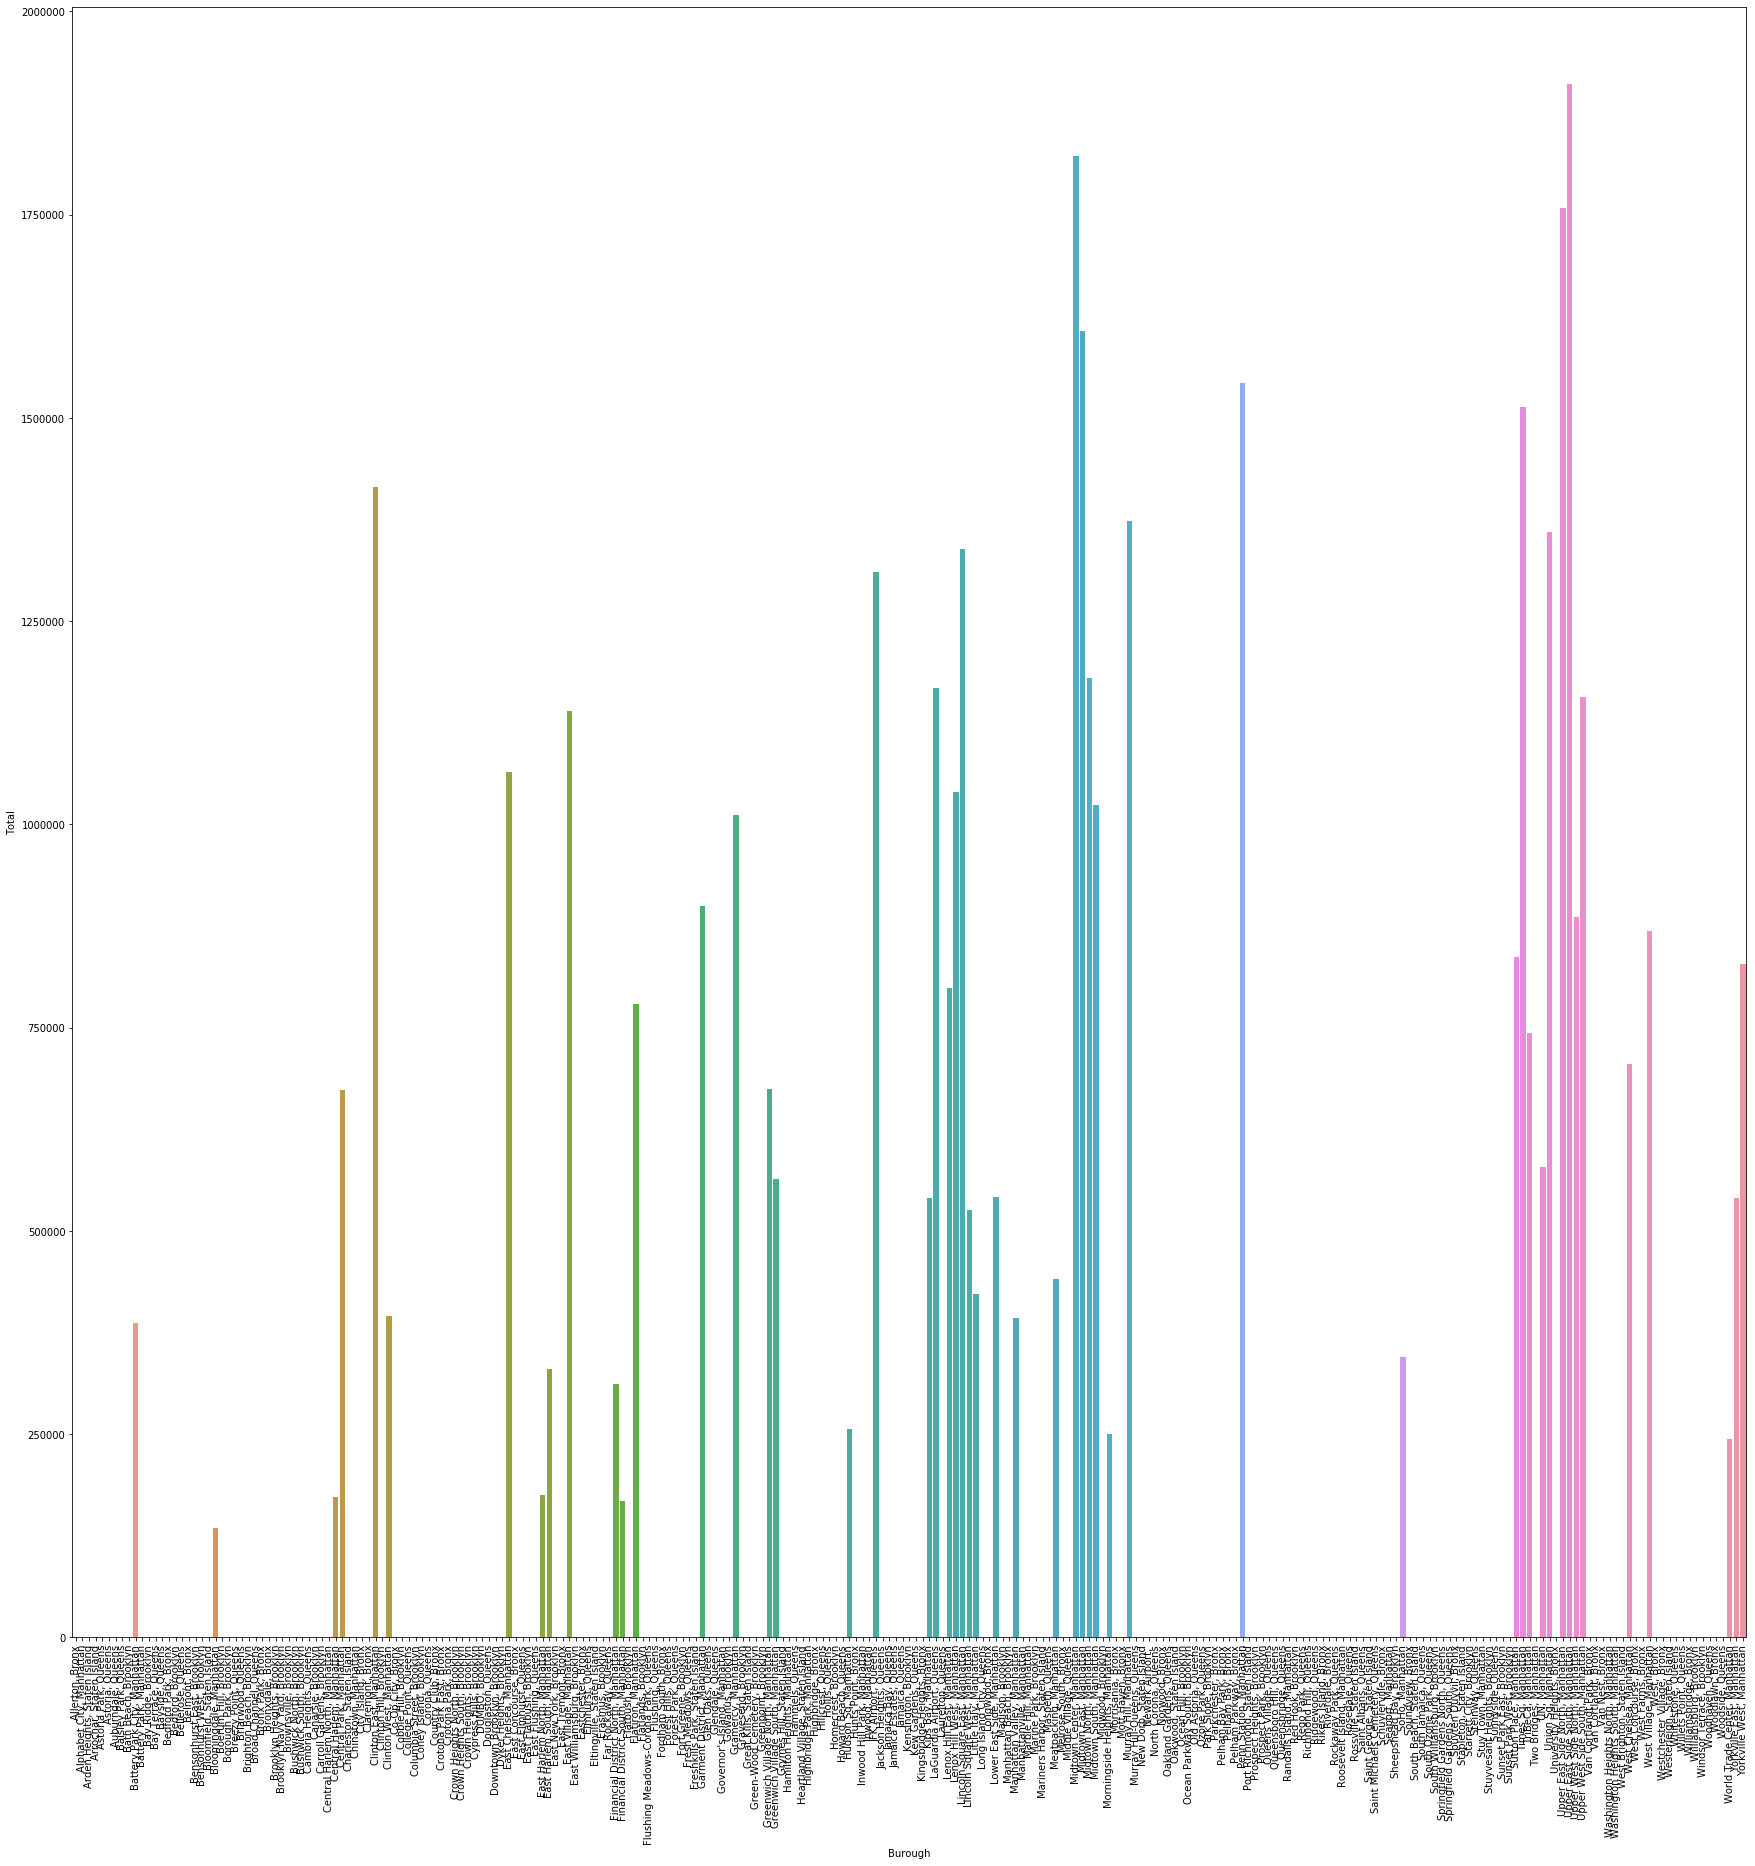

In [149]:
p
plt.figure(figsize = (30,30))
sns.barplot(x = p.index, y = p['pickup_date'])
plt.xlabel('Burough')
plt.ylabel('Total')
plt.xticks(rotation = '90')
plt.show()

In [121]:
df3 = x['trip_distance']

In [122]:
df3

month
1     7504199
2     6944863
3     7775552
4     7359531
5     7495638
6     6877596
7          92
8          52
9          27
10         12
11         12
12        451
Name: trip_distance, dtype: int64

In [97]:
value = taxi19['month'].value_counts

In [98]:
value

<bound method IndexOpsMixin.value_counts of 0           1
1           1
2           1
3           1
4           1
           ..
43958020    1
43958021    1
43958022    2
43958023    3
43958024    4
Name: month, Length: 43958025, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]>

In [99]:
plt.figure(figsize = (30,30))
sns.barplot(x = taxi19.month, y = taxi19['month'].value_counts)
plt.xlabel('Month')
plt.ylabel('Rides')
plt.xticks(rotation = '90')
plt.show()

TypeError: float() argument must be a string or a number, not 'method'

<Figure size 2160x2160 with 0 Axes>

In [90]:
df3.columns

MultiIndex([('trip_distance', 'mean'),
            ('trip_distance',  'sum'),
            ( 'PULocationID', 'mean'),
            ( 'PULocationID',  'sum'),
            ( 'DOLocationID', 'mean'),
            ( 'DOLocationID',  'sum'),
            ( 'payment_type', 'mean'),
            ( 'payment_type',  'sum'),
            ( 'total_amount', 'mean'),
            ( 'total_amount',  'sum'),
            (      'weekday', 'mean'),
            (      'weekday',  'sum'),
            (         'hour', 'mean'),
            (         'hour',  'sum'),
            (         'year', 'mean'),
            (         'year',  'sum'),
            (     'latitude', 'mean'),
            (     'latitude',  'sum'),
            (    'longitude', 'mean'),
            (    'longitude',  'sum')],
           )

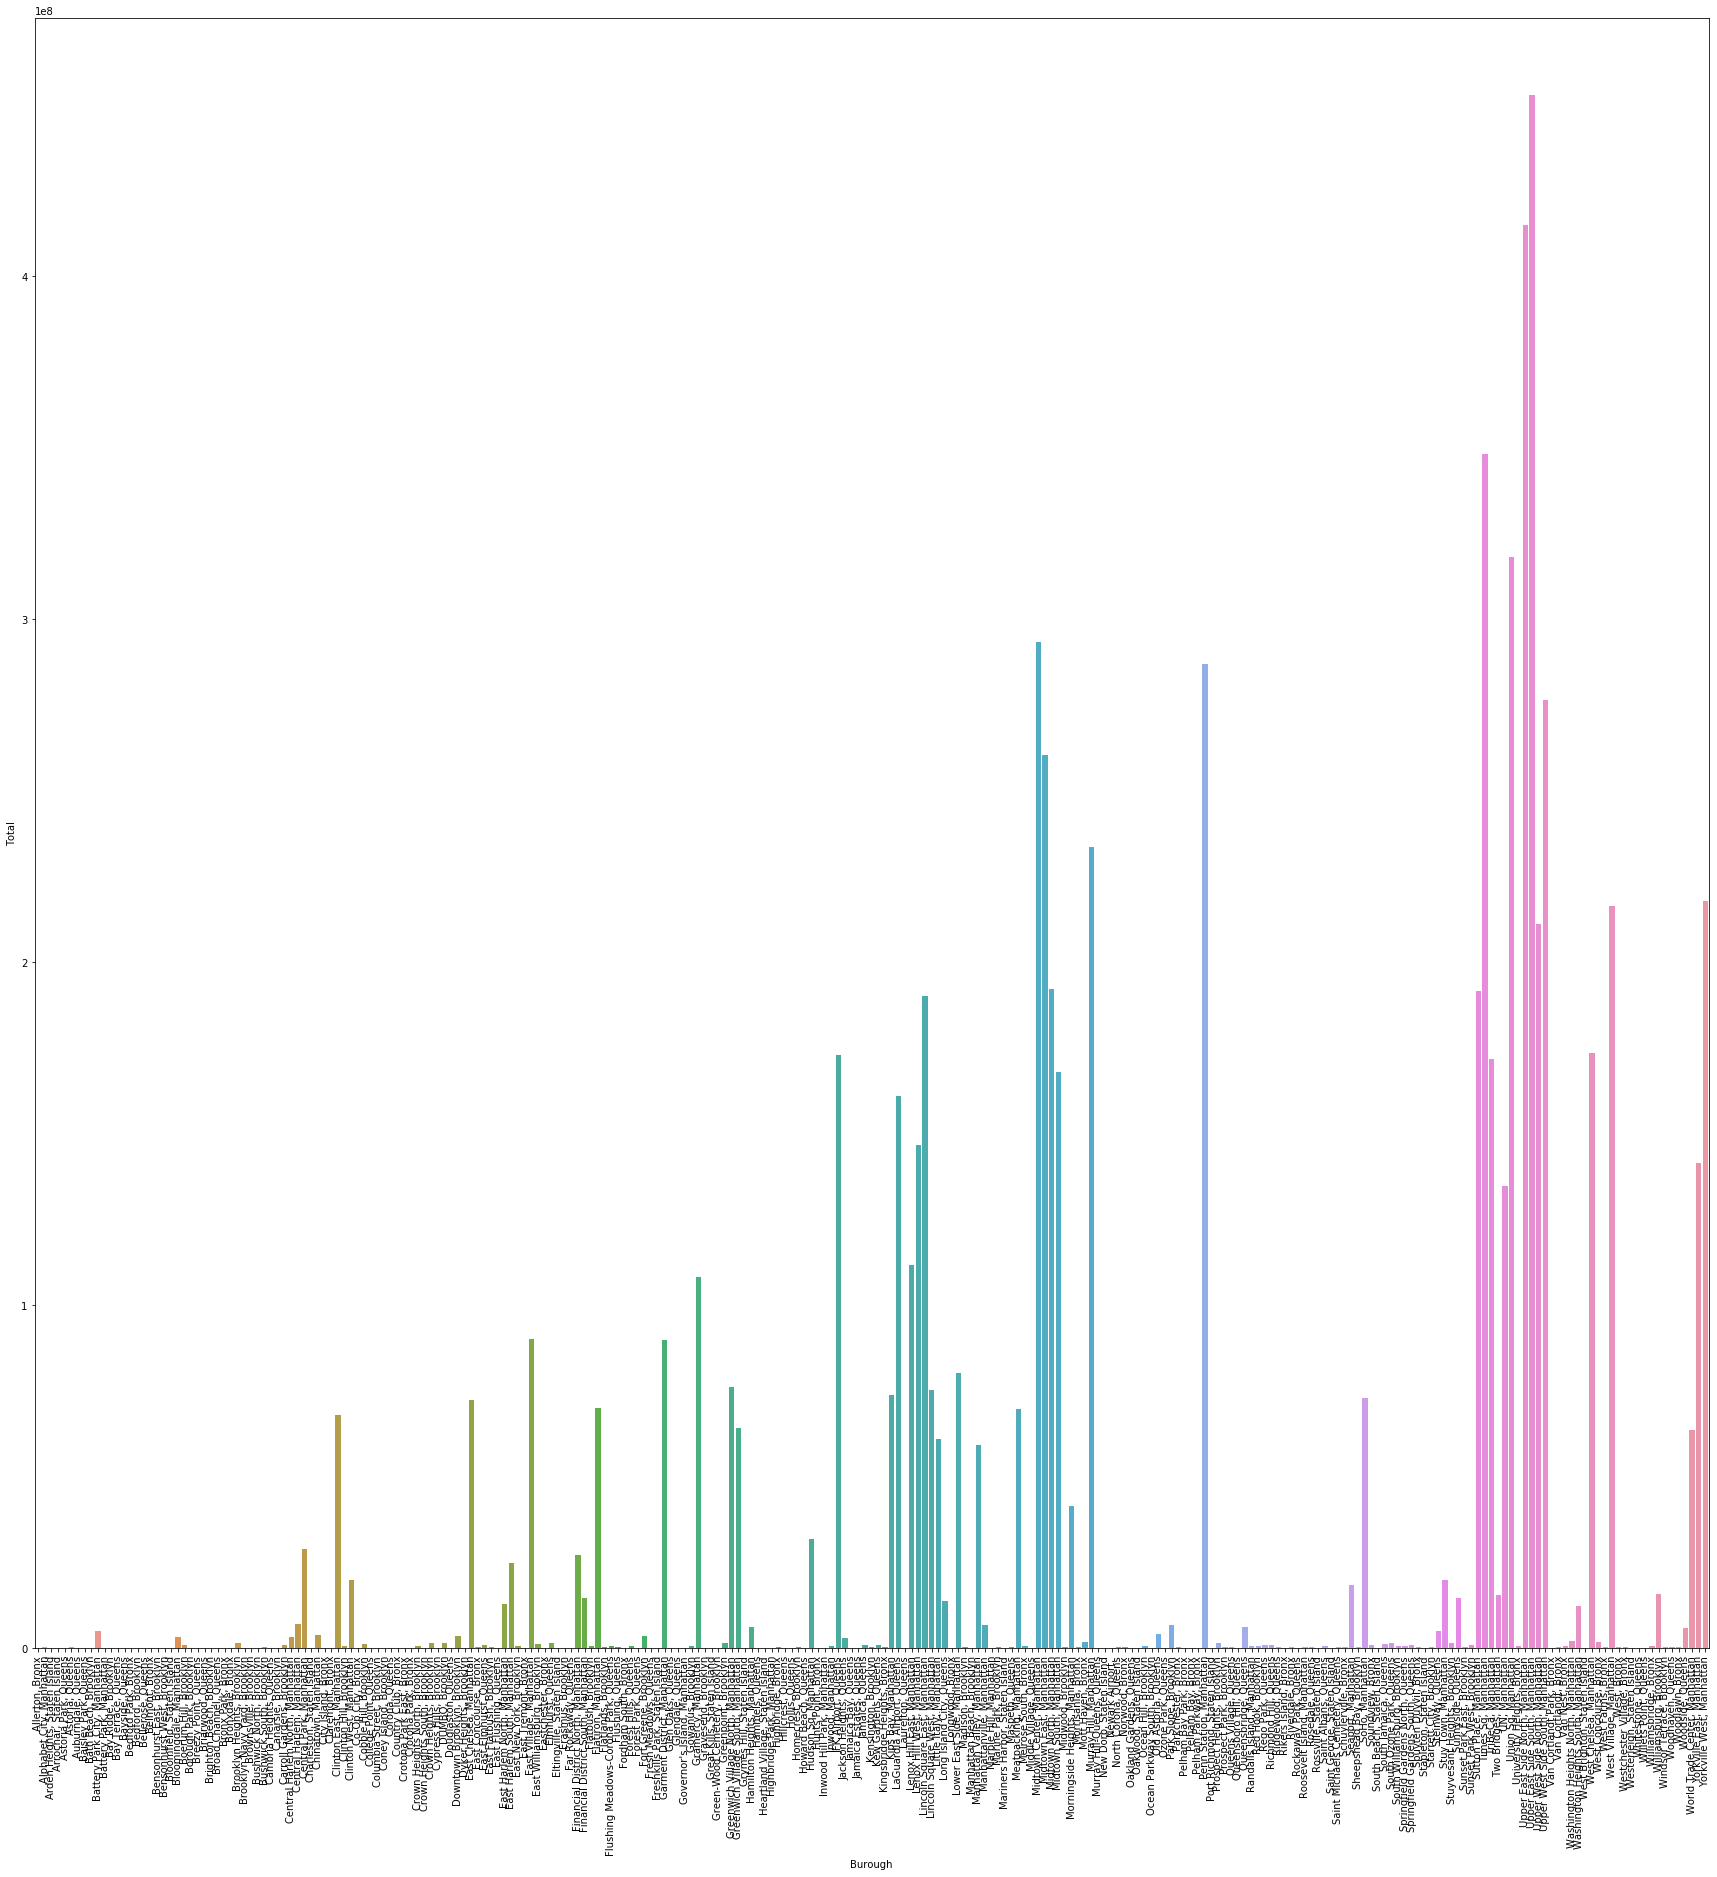

In [91]:
plt.figure(figsize = (30,30))
sns.barplot(x = df3.index, y = df3['PULocationID',  'sum'])
plt.xlabel('Burough')
plt.ylabel('Total')
plt.xticks(rotation = '90')
plt.show()

In [41]:
df = taxi19.groupby('burough').mean()

In [42]:
df.head()

,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,weekday,month,hour,year,latitude,longitude
burough,,,,,,,,,,,
"Allerton, Bronx",8.067488,3.0,137.301649,1.172648,32.951959,2.988361,3.422890,11.333657,2019.000000,40.865430,-73.867365
"Alphabet City, Manhattan",2.682975,4.0,139.256545,1.310295,17.008896,3.681452,3.394885,11.632926,2018.999975,40.725102,-73.979583
"Arden Heights, Staten Island",24.253707,5.0,134.387931,1.112069,80.450776,2.655172,3.862069,13.060345,2019.000000,40.557630,-74.188609
"Arrochar, Staten Island",3.716467,6.0,50.341317,1.886228,36.143653,2.982036,3.131737,10.185629,2019.000000,40.598438,-74.072641
"Astoria Park, Queens",4.993866,8.0,159.050186,1.379182,44.342268,3.092937,3.730483,12.312268,2019.000000,40.778828,-73.922626


In [ ]:
df = taxi19.groupby('burough').mean()

In [43]:
import seaborn as sns

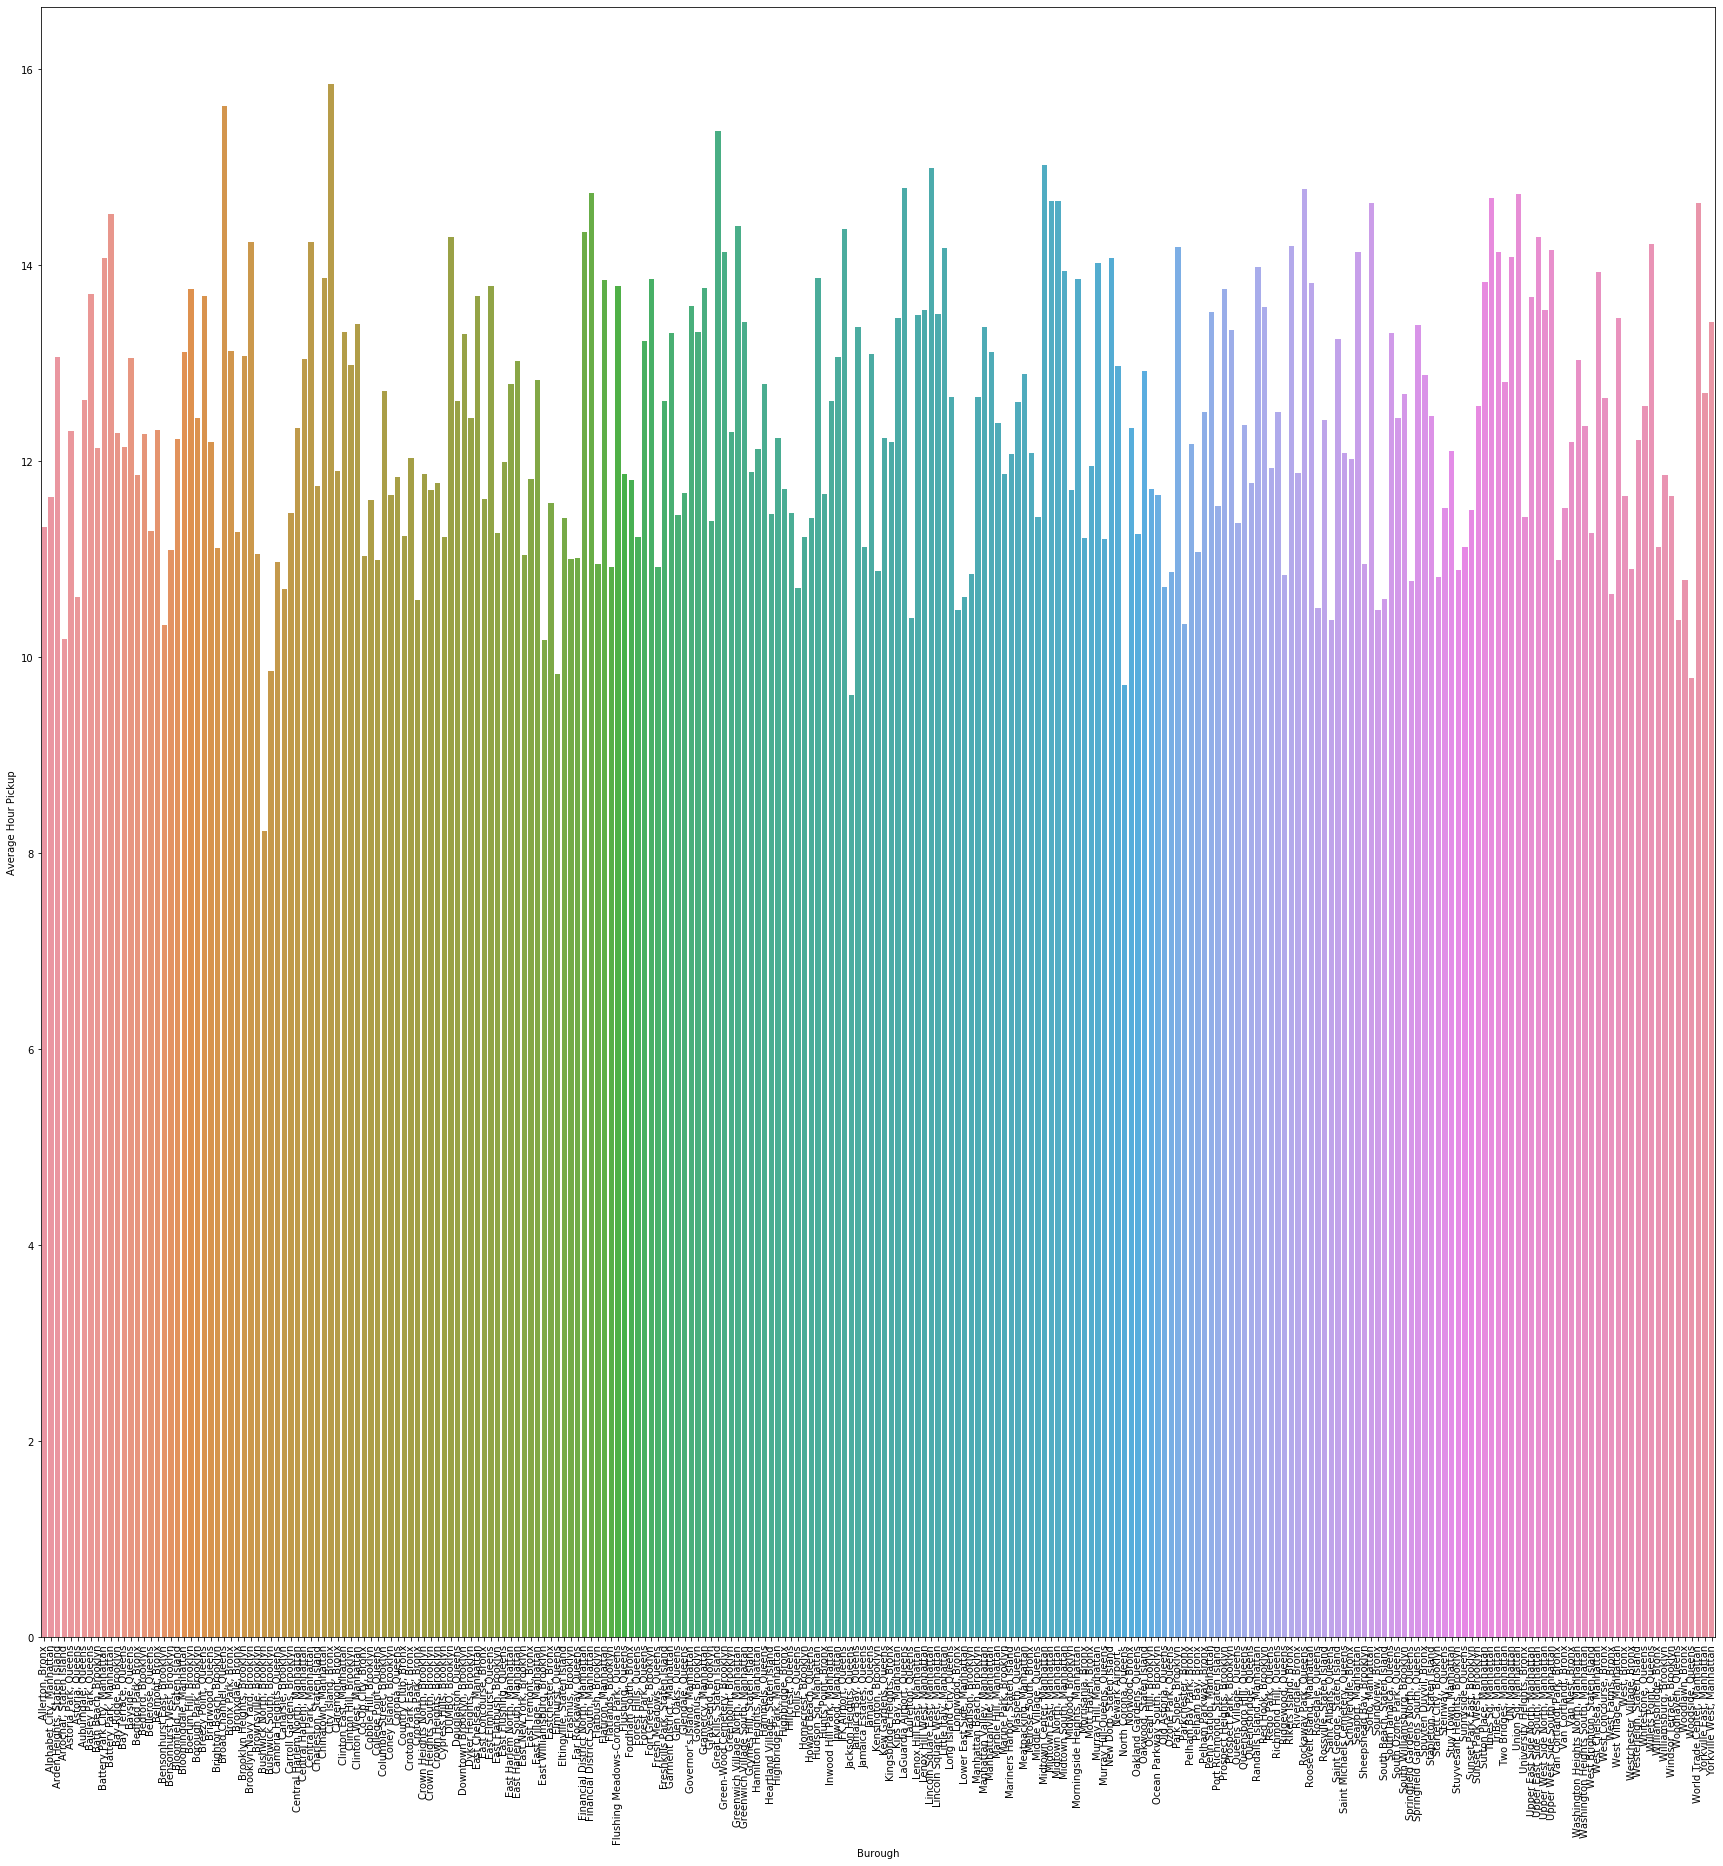

In [47]:
plt.figure(figsize = (30,30))
sns.barplot(x = df.index, y = df.hour)
plt.xlabel('Burough')
plt.ylabel('Average Hour Pickup')
plt.xticks(rotation = '90')
plt.show()

In [55]:
df2 = taxi19.groupby('burough').aggregate({'month': ['std', 'mean', sum]})

In [56]:
df2

month                   
                                    std      mean      sum
burough                                                   
Allerton, Bronx                1.711077  3.422890     3529
Alphabet City, Manhattan       1.678832  3.394885   270260
Arden Heights, Staten Island   1.479698  3.862069      448
Arrochar, Staten Island        1.507215  3.131737      523
Astoria Park, Queens           1.674611  3.730483     2007
...                                 ...       ...      ...
Woodlawn, Bronx                1.624297  2.987072     3928
Woodside, Queens               1.713995  3.488029    79691
World Trade Center, Manhattan  1.685402  3.571773   869223
Yorkville East, Manhattan      1.708447  3.441106  1857760
Yorkville West, Manhattan      1.712203  3.405546  2821134

[251 rows x 3 columns]

#### Send to SQL

In [34]:
taxi19.to_sql('y_nineteen', alc.db, if_exists = 'replace', index = False, chunksize = 100000)

KeyboardInterrupt: 

In [28]:
# def subtract(a, b):
#     return a - b

In [30]:
# Ytaxi19['total_time'] = np.vectorize(subtract)(Ytaxi19['tpep_dropoff_datetime'], Ytaxi19['tpep_pickup_datetime'])

KeyboardInterrupt: 

# 2018

In [46]:
jan18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-01.csv')

In [47]:
jan18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


In [48]:
feb18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-02.csv')

In [49]:
feb18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8492076 entries, 0 to 8492075
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


In [50]:
mar18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-03.csv')

In [51]:
mar18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9430376 entries, 0 to 9430375
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [52]:
apr18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-04.csv')

In [53]:
apr18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9305515 entries, 0 to 9305514
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [54]:
may18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-05.csv')

In [55]:
may18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9224063 entries, 0 to 9224062
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [56]:
jun18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-06.csv')

In [57]:
jun18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8713831 entries, 0 to 8713830
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


In [58]:
jul18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-07.csv')

In [59]:
jul18.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-07-01 00:28:09,2018-07-01 00:28:51,1,5.3,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
1,1,2018-07-01 00:29:27,2018-07-01 00:30:17,1,5.3,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
2,1,2018-07-01 00:04:19,2018-07-01 00:08:29,2,0.7,1,N,211,144,1,5.0,0.5,0.5,1.25,0.0,0.3,7.55
3,1,2018-07-01 00:14:26,2018-07-01 00:36:35,1,4.8,1,N,144,142,1,18.0,0.5,0.5,1.00,0.0,0.3,20.30
4,1,2018-07-01 00:41:56,2018-07-01 00:50:54,1,1.8,1,N,142,141,2,8.5,0.5,0.5,0.00,0.0,0.3,9.80


In [60]:
aug18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-08.csv')

In [61]:
aug18.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-08-01 00:44:35,2018-08-01 01:03:22,1,5.6,1,N,238,79,1,19.0,0.5,0.5,4.00,0.0,0.3,24.30
1,1,2018-08-01 00:02:19,2018-08-01 00:02:31,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
2,1,2018-08-01 00:13:25,2018-08-01 00:24:40,1,2.9,1,N,138,7,1,11.5,0.5,0.5,2.55,0.0,0.3,15.35
3,1,2018-08-01 00:10:37,2018-08-01 00:49:10,1,8.4,1,N,231,7,1,30.0,0.5,0.5,7.80,0.0,0.3,39.10
4,1,2018-08-01 00:02:18,2018-08-01 00:07:32,2,0.7,1,N,79,148,1,5.5,0.5,0.5,0.00,0.0,0.3,6.80


In [62]:
sep18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-09.csv')

In [63]:
sep18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040133 entries, 0 to 8040132
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.0+ GB


In [64]:
octo18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-10.csv')

In [65]:
octo18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8821105 entries, 0 to 8821104
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


In [66]:
nov18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-11.csv')

In [67]:
nov18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145164 entries, 0 to 8145163
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.0+ GB


In [68]:
dec18 = pd.read_csv('yellowtaxi-trip-data/2018/yellow_tripdata_2018-12.csv')

In [69]:
dec18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8173231 entries, 0 to 8173230
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.0+ GB


### Concat 2018 Files 

In [70]:
taxi18_data = [jan18, feb18, mar18, apr18, may18, jun18, jul18, aug18, sep18, octo18, nov18, dec18]

In [71]:
Ytaxi18 = pd.concat(taxi18_data, axis=0, sort=False, ignore_index = True)

In [72]:
Ytaxi18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102804250 entries, 0 to 102804249
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 13.0+ GB


In [45]:
Ytaxi18.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [74]:
Ytaxi18.drop(['VendorID','passenger_count','RatecodeID','store_and_fwd_flag','extra','mta_tax','improvement_surcharge','fare_amount','tip_amount','tolls_amount'], axis = 1, inplace = True)

In [15]:
#save csv

In [ ]:
# Ytaxi18.to_csv('Ytaxi18.csv',index=False)

In [ ]:
#read csv

## Features 2018

In [ ]:
Ytaxi18 = pd.read_csv('Ytaxi18.csv')

In [78]:
Ytaxi18['tpep_pickup_datetime'] = pd.to_datetime(Ytaxi18['tpep_pickup_datetime'])

In [79]:
Ytaxi18['tpep_dropoff_datetime'] = pd.to_datetime(Ytaxi18['tpep_dropoff_datetime'])

In [80]:
#weekday
Ytaxi18['weekday'] = [datetime.weekday(d) for d in Ytaxi18['tpep_pickup_datetime']]

In [150]:
#month
Ytaxi18['month'] = pd.DatetimeIndex(Ytaxi18['tpep_pickup_datetime']).month

In [ ]:
#year
Ytaxi18['year'] = pd.DatetimeIndex(Ytaxi18['tpep_pickup_datetime']).year

In [ ]:
#hour
Ytaxi18['hour'] = pd.DatetimeIndex(Ytaxi18['tpep_pickup_datetime']).hour

### merge

In [101]:
taxi18 = Ytaxi18.merge(zone, on='PULocationID')

In [ ]:
taxi18.rename(columns={'tpep_pickup_datetime': 'pickup_date', 'tpep_dropoff_datetime' : 'dropoff_date','Address':'burough'}, inplace = True)

### save_csv

In [ ]:
taxi18.to_csv('taxi19.csv',index=False)

#### to sql

In [ ]:
taxi18.to_sql('y_eighteen', alc.db, if_exists = 'replace', index = False, chunksize = 100000)

# 2017

In [112]:
jan17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-01.csv')

In [113]:
jan17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9710124 entries, 0 to 9710123
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [114]:
feb17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-02.csv')

In [115]:
feb17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168825 entries, 0 to 9168824
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [116]:
mar17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-03.csv')

In [117]:
mar17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10294628 entries, 0 to 10294627
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ GB


In [118]:
apr17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-04.csv')

In [119]:
apr17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10046188 entries, 0 to 10046187
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ GB


In [120]:
may17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-05.csv')

In [121]:
may17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10102124 entries, 0 to 10102123
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ GB


In [122]:
jun17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-06.csv')

In [123]:
jun17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656993 entries, 0 to 9656992
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [124]:
jul17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-07.csv')

In [125]:
jul17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8588486 entries, 0 to 8588485
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


In [126]:
aug17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-08.csv')

In [127]:
aug17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8422153 entries, 0 to 8422152
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


In [128]:
sep17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-09.csv')

In [129]:
sep17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8945459 entries, 0 to 8945458
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


In [130]:
octo17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-10.csv')

In [131]:
octo17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9768815 entries, 0 to 9768814
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [132]:
nov17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-11.csv')

In [133]:
nov17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9284803 entries, 0 to 9284802
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [134]:
dec17 = pd.read_csv('yellowtaxi-trip-data/2017/yellow_tripdata_2017-12.csv')

In [135]:
dec17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508276 entries, 0 to 9508275
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


### Concat 2017 Files

In [136]:
taxi17_data = [jan17, feb17, mar17, apr17, may17, jun17, jul17, aug17, sep17, octo17, nov17, dec17]

In [137]:
Ytaxi17 = pd.concat(taxi17_data, axis=0, sort=False, ignore_index = True)

In [138]:
Ytaxi17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113496874 entries, 0 to 113496873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 14.4+ GB


In [139]:
Ytaxi17.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


In [140]:
Ytaxi17.drop(['VendorID','passenger_count','RatecodeID','store_and_fwd_flag','extra','mta_tax','improvement_surcharge','fare_amount','tip_amount','tolls_amount'], axis = 1, inplace = True)

In [15]:
#save csv

In [ ]:
# Ytaxi17.to_csv('Ytaxi17.csv',index=False)

In [ ]:
#read csv

In [141]:
Ytaxi17['tpep_pickup_datetime'] = pd.to_datetime(Ytaxi17['tpep_pickup_datetime'])

In [142]:
Ytaxi17['tpep_dropoff_datetime'] = pd.to_datetime(Ytaxi17['tpep_dropoff_datetime'])

In [143]:
#weekday
Ytaxi17['weekday'] = [datetime.weekday(d) for d in Ytaxi17['tpep_pickup_datetime']]

In [148]:
#month
Ytaxi17['month'] = pd.DatetimeIndex(Ytaxi17['tpep_pickup_datetime']).month

In [ ]:
#year
Ytaxi17['year'] = pd.DatetimeIndex(Ytaxi17['tpep_pickup_datetime']).year


In [ ]:
#hour
Ytaxi17['hour'] = pd.DatetimeIndex(Ytaxi17['tpep_pickup_datetime']).hour

### merge

In [160]:
taxi17 = Ytaxi17.merge(zone, on='PULocationID')

In [ ]:
taxi17.rename(columns={'tpep_pickup_datetime': 'pickup_date', 'tpep_dropoff_datetime' : 'dropoff_date','Address':'burough'}, inplace = True)

### save_csv

In [ ]:
taxi17.to_csv('taxi19.csv',index=False)

### to sql

In [ ]:
taxi17.to_sql('y_seventeen', alc.db, if_exists = 'replace', index = False, chunksize = 100000)

# Concat all 2017-2019 files

In [74]:
taxi_data = [taxi17, taxi18, taxi19]



In [75]:
Yellow_Cab_17_18_19 = pd.concat(taxi_data, axis=0, sort=False, ignore_index = True)



KeyboardInterrupt: 

In [ ]:
Yellow_Cab_17_18_19 .info()

### Cleaning

In [ ]:
# uber_concat['datetime'] = pd.to_datetime(uber_concat['Date/Time'])

In [ ]:
# uber_concat['Date'] = [datetime.date(d) for d in uber_concat['datetime']] 

In [ ]:
# uber_concat['Time'] = [datetime.time(d) for d in uber_concat['datetime']] 

In [ ]:
# uber_concat['Weekday'] = [datetime.weekday(d) for d in uber_concat['datetime']] 

In [ ]:
# uber_concat['Week'] = uber_concat['Date/Time'].apply(lambda x : pendulum.parse(x, strict = False).week_of_month)

In [ ]:
# uber_concat['Hour'] = uber_concat['Date/Time'].apply(lambda x : pendulum.parse(x, strict = False).hour)

In [ ]:
# uber_concat.drop(['Date/Time'], axis = 1 , inplace = True)

In [ ]:
# uber_concat.drop(['Base'], axis = 1 , inplace = True)

In [ ]:
# uber_concat.head()

### number of rides by day/week/hour

In [ ]:
# df = pd.DataFrame({"Hour": [], "Number_Rides": []})

In [ ]:
# df

In [ ]:
# num_rides_hr = []

In [ ]:
# num_rides_hr = uber_concat['Hour'].apply(lambda x : for hour in x   num_rides_hr.sum)

In [ ]:
# def num_rides_hr(col):
# #     num_rides = []
#     for num in col:
#         if num == num:
#             num_rides += 1
# #             num_rides.append(num.sum(), index = num)

In [ ]:
# num_rides_hr(uber_concat['Hour'])

In [ ]:
# num_rides